**Projeto - Super Desafio**



# Importando Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
pd.options.display.float_format = "{:.2f}".format

In [2]:
#Importando valor gasto em profissionais para cada estado ao longo de 2008 até 2021
url = "https://raw.githubusercontent.com/hidekiaoyanagi/df_alura_SUS_21/main/A200228189_28_143_208.csv"
df = pd.read_csv(url, encoding="ISO-8859-1", skiprows=3, skipfooter= 12 , sep=";", thousands= '.', decimal= ",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
dados_estados = df
dados_estados.drop('Total', axis = 1)
dados_estados.replace('-', 0.0, inplace = True)

print('Número de Linhas {}'.format(dados_estados.shape[0]))
print('Número de Colunas {}'.format(dados_estados.shape[1]))


Número de Linhas 27
Número de Colunas 167


In [4]:
dados_estados.describe()

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,Total
count,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,...,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00,27.00
mean,2975644.60,4400954.06,4807793.58,4977099.12,5205244.90,5447283.03,5523886.38,5432746.34,5463486.94,5354482.37,4862765.68,5635044.85,5386010.41,5466704.79,6138117.54,5982639.85,6262429.99,6143108.96,6304454.43,6320775.49,6278312.27,6272904.78,6057706.84,6133331.44,5864371.40,6501761.50,6527093.14,6642519.82,6456826.98,6603212.19,6693586.83,6492429.21,6456820.22,6875093.00,6847077.66,6665606.85,6684375.53,7062239.36,7145368.22,7237860.01,...,9352357.62,9541131.94,9654709.89,9352097.00,9480542.78,9151465.88,8885226.49,9353926.37,9016413.57,9352072.56,9494011.61,9901250.13,9517596.55,9965550.15,10031244.51,9763968.32,10081940.96,9575461.74,9215937.39,9584926.66,9339812.95,9320670.87,7949155.79,8459028.21,8902659.22,10049983.11,10263783.20,10122131.23,10246568.60,10210726.26,10014281.87,10414376.43,10575997.00,11982525.86,13182376.69,13921686.56,14388741.50,14125019.81,13145031.49,1346169943.85
std,3521437.91,5547433.33,5953585.43,6199241.14,6960340.89,7068322.84,7190220.26,6909105.17,7019304.97,6756287.93,6236677.22,7198159.78,6899938.01,7039004.82,7989801.96,7629291.42,8051433.20,8005626.30,8165912.88,8351225.62,8109067.14,8216716.98,7729427.95,7947454.89,7640546.71,8524604.88,8608716.65,8588023.28,8431457.20,8529708.35,8678680.48,8505966.50,8250642.37,9117692.49,9230031.42,8814266.40,9088275.32,9443270.64,9392748.95,9712223.20,...,11580699.23,11767945.38,12063881.41,11542848.82,11805052.61,11352814.39,11219107.13,11825961.17,11344258.79,11715790.68,11957576.61,12286167.43,11744698.30,12279029.33,12542942.21,12008237.66,12561008.54,11750288.71,11300367.93,12031245.60,11559995.05,11701942.61,9642573.74,10289923.32,11036635.06,12783700.13,12564424.44,12865215.25,12763182.26,12589860.45,12370052.77,12910837.75,12930732.05,14606418.41,16324545.63,17581585.78,18018523.77,17693762.04,16283418.50,1718720550.44
min,192366.41,236353.89,182718.31,227747.80,224131.08,220758.99,274820.92,232356.52,235840.35,297319.23,277114.87,335618.60,232327.21,250131.89,360283.72,352109.81,400853.58,427822.58,422132.95,480772.17,289509.61,393365.78,387455.62,371097.27,319900.96,421958.71,428661.29,404829.10,425006.63,427379.00,408289.72,444516.31,453847.30,422583.63,287984.47,300029.66,254771.54,338524.78,344528.89,258285.89,...,584034.35,526784.63,664229.45,607913.89,698355.71,604982.70,500987.12,611847.74,462317.03,487903.90,553738.04,605052.61,566300.13,606129.15,721241.45,599479.82,643885.64,650184.46,590991.10,601697.26,580452.21,467083.20,463067.57,538814.77,517189.88,670224.48,684849.03,636783.47,562513.21,615151.59,641124.52,669758.26,731924.49,770335.25,858923.90,869676.58,707256.04,816828.30,829528.67,87176095.40
25%,1060412.98,1583615.66,1693591.59,1810811.50,1824233.21,1990275.35,1987993.34,1952824.95,1969097.76,1963753.06,1649466.62,1806448.67,19040

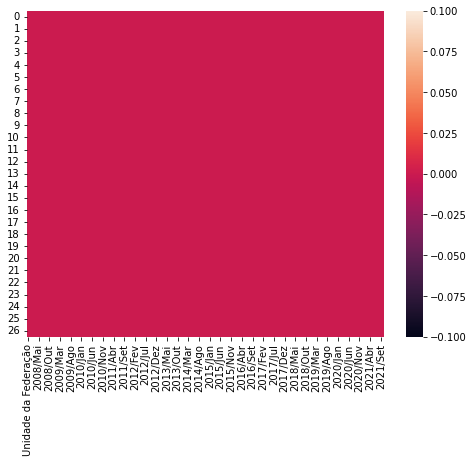

In [5]:
plt.figure(figsize=(8,6));
sns.heatmap(dados_estados.isnull());

In [6]:

dados_estados_numerico = dados_estados.select_dtypes(include = ['int64', 'float64'])

# Analise Descritiva
dados_estados_min = pd.DataFrame(dados_estados_numerico .min())
dados_estados_max = pd.DataFrame(dados_estados_numerico .max())
dados_estados_range = pd.DataFrame(dados_estados_max - dados_estados_min)
dados_estados_mean = pd.DataFrame(dados_estados_numerico.mean())
dados_estados_std = pd.DataFrame(dados_estados_numerico.std())
dados_estados_skew = pd.DataFrame(dados_estados_numerico.skew())
dados_estados_kurtosis = pd.DataFrame(dados_estados_numerico.kurtosis())

dados_estados_description = pd.concat([dados_estados_min, dados_estados_max, dados_estados_range, dados_estados_mean, dados_estados_std, dados_estados_skew, dados_estados_kurtosis], axis = 1).round(2)
dados_estados_description.columns = ['min', 'max', 'range', 'mean', 'std', 'skew', 'kurtosis']
dados_estados_description

,min,max,range,mean,std,skew,kurtosis
2008/Jan,192366.41,16943801.36,16751434.95,2975644.60,3521437.91,2.73,9.21
2008/Fev,236353.89,26838189.36,26601835.47,4400954.06,5547433.33,2.90,10.12
2008/Mar,182718.31,28631821.05,28449102.74,4807793.58,5953585.43,2.81,9.64
2008/Abr,227747.80,30127014.30,29899266.50,4977099.12,6199241.14,2.87,10.21
2008/Mai,224131.08,34768625.94,34544494.86,5205244.90,6960340.89,3.24,12.72
...,...,...,...,...,...,...,...
2021/Mai,869676.58,86195548.97,85325872.39,13921686.56,17581585.78,2.99,10.92
2021/Jun,707256.04,87094969.02,86387712.98,14388741.50,18018523.77,2.85,9.99
2021/Jul,816828.30,85615388.80,84798560.50,14125019.81,17693762.04,2.86,10.05
2021/Ago,829528.67,78004774.72,77175246.05,13145031.49,16283418.50,2.77,9.39


In [7]:
if 'Unidade da Federação' in dados_estados.columns:
  dados_estados = dados_estados.set_index("Unidade da Federação")

dados_estados = dados_estados.astype(float)
dados_estados

,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,296869.78,627546.77,346162.81,327945.93,343959.02,312525.08,680606.47,726070.38,702255.49,686771.19,651342.67,683986.31,613523.95,693671.59,778370.82,792107.11,830413.86,811704.29,843131.51,786839.36,794682.63,855617.11,867103.38,831029.02,771439.32,759294.55,811320.60,858143.97,919326.64,902538.23,989405.98,886032.69,977226.66,926456.54,908494.55,844769.96,894295.38,804054.48,882394.20,1011884.34,...,1682729.76,1803527.82,1505998.02,1827863.05,1628627.79,1720477.75,1854922.67,1572793.55,1781805.58,1896500.73,1951423.62,1663106.36,1820579.62,1793227.96,1711467.22,1881985.44,1830453.65,1562110.53,1853761.48,1516597.42,1591831.26,1508339.04,1544075.64,1702088.20,2135968.61,2129402.93,1992032.98,1530284.07,1796612.80,1658759.70,1905694.83,1870290.23,2728790.62,2781396.43,2845149.80,2708563.32,2423961.22,2109384.55,1815381.34,215726772.35
12 Acre,236519.77,357039.06,433377.08,409454.44,411222.57,456674.17,613743.31,498876.80,505753.28,472603.79,450883.23,577815.35,607645.51,581846.05,523634.04,672818.91,662683.41,587082.47,620704.58,577069.85,0.00,655651.62,511667.61,599592.27,602280.84,484089.05,600005.40,649331.93,687039.84,574955.80,540484.31,581185.15,594626.47,537210.97,615029.17,590392.30,723307.80,607965.24,634446.45,641743.58,...,726665.37,712919.26,607913.89,698355.71,725873.23,500987.12,611847.74,462317.03,703965.10,556762.01,653847.21,772272.26,842400.09,793310.57,742655.21,781583.63,712774.37,702465.82,783659.69,748246.06,705611.05,540605.25,689996.22,729637.47,878945.75,884086.46,820784.81,951184.94,819557.10,850956.27,867057.64,792248.81,899243.38,1250909.56,1266393.60,790731.15,1094487.01,927165.04,0.00,113820574.62
13 Amazonas,1141750.72,1658491.74,1911631.08,1921334.27,1769600.11,1926911.92,2168182.12,2139775.58,2150345.25,2060094.62,1634658.97,1842669.96,1728075.32,1578294.33,2356321.96,2006299.28,2041951.84,2071066.75,2139096.37,2184430.28,2213003.56,2170167.17,2014322.36,2071487.90,2176954.44,2011569.99,2180033.42,2320359.95,2213869.54,2364096.78,2237356.41,1899649.12,1820650.58,2308949.91,2361536.20,2343246.29,2297452.10,2090633.41,2229932.30,2281851.94,...,3359752.15,3329188.46,3582199.75,3714977.40,3493875.02,3284947.28,3812222.00,3216760.05,3578416.47,3483937.69,3585874.71,3435864.78,3556161.54,3552333.82,3728455.82,3579927.93,3567350.98,3297976.16,3590400.82,3342150.43,3441546.56,3046574.65,4068170.63,4370405.73,4097131.03,3791307.46,3890421.16,3646773.36,4207936.85,3684290.37,4228123.82,5153091.43,4727823.54,4815984.62,5130263.35,5072382.22,4727810.36,4620649.47,4054511.58,468517324.42
14 Roraima,192366.41,236353.89,182718.31,227747.80,250105.36,220758.99,274820.92,232356.52,235840.35,297319.23,277114.87,335618.60,232327.21,250131.89,360283.72,352109.81,400853.58,427822.58,422132.95,489264.92,453903.67,289509.61,393365.78,387455.62,371097.27,319900.96,490519.85,458649.04,404829.10,425006.63,427379.00,408289.72,444516.31,453847.30,422583.63,287984.47,300029.66,254771.54,338524.78,344528.89,...,735326.04,734393.12,713379.12,752212.42,710494.62,799970.74,655585.59,648181.91,487903.90,553738.04,605052.61,723794.81,781305.72,1019648.09,881665.73,790806.34,792110.52,708472.02,760452.83,72552

In [8]:
#normalizando os investimentos baseado na média de investimento total daquele ano


meses_ano = dados_estados.columns.tolist()
for meses in meses_ano:
  media_mes = dados_estados[meses].mean()
  dados_estados[meses] = dados_estados[meses]/media_mes

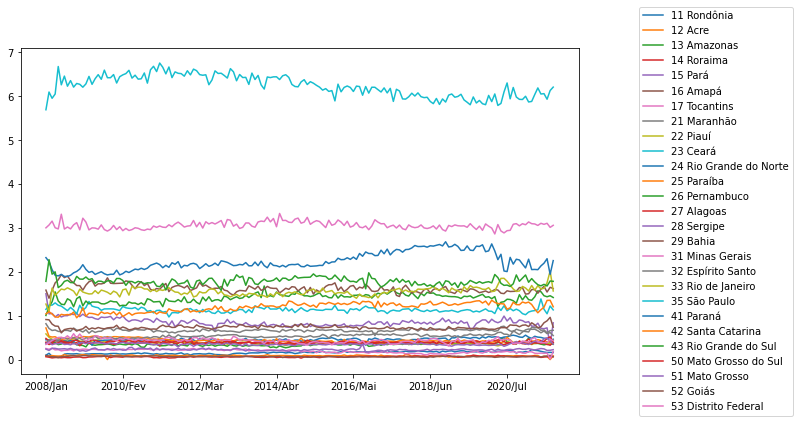

In [9]:
az = dados_estados.T.plot(figsize=(10,6))
az.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [10]:
dados_estados['Medias_gasto_profissionais'] = dados_estados.mean(axis=1)
dados_estados_medias = pd.DataFrame(dados_estados['Medias_gasto_profissionais'])
dados_estados_medias

,Medias_gasto_profissionais
Unidade da Federação,
11 Rondônia,0.16
12 Acre,0.09
13 Amazonas,0.35
14 Roraima,0.06
15 Pará,0.85
16 Amapá,0.07
17 Tocantins,0.19
21 Maranhão,0.67
22 Piauí,0.38


In [11]:
#Importando taxa de mortalidade para cada estado ao longo de 2008 até 2021
url2 = "https://raw.githubusercontent.com/hidekiaoyanagi/df_alura_SUS_21/main/A205342189_28_143_208.csv"
df2 = pd.read_csv(url2, encoding="ISO-8859-1", skiprows=3, skipfooter= 12 , sep=";", thousands= '.', decimal= ",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
df2

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,1.38,1.36,1.04,1.00,1.20,1.21,1.44,1.50,1.40,1.75,1.28,1.24,1.55,1.24,1.40,1.57,1.16,1.53,1.55,1.44,1.43,1.53,1.74,1.20,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,...,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.12,5.27,5.51,4.54,3.52,2.90,4.38,4.95,5.03,8.42,7.40,6.58,5.62,4.63,4.03,4.34,2.79
1,12 Acre,1.44,3.06,2.01,2.76,2.60,1.76,2.34,2.73,2.28,1.87,1.38,1.60,3.07,2.29,2.23,2.19,2.30,1.84,2.18,1.92,nan,2.75,2.55,2.57,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,...,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98,3.65,5.40,5.17,7.79,6.58,3.82,4.86,4.15,nan,3.01
2,13 Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,1.56,1.27,1.65,2.09,1.52,1.24,2.11,2.07,2.33,2.08,2.38,2.26,1.98,2.10,2.09,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,...,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.36,9.78,6.08,4.61,4.39,3.94,4.73,4.35,9.08,9.32,10.71,6.77,5.06,4.71,4.74,3.65,3.71,2.98
3,14 Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,...,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63,6.02,9.75,8.10,6.30,5.23,5.49,4.68,4.84,4.43,2.78
4,15 Pará,1.41,1.40,1.53,1.27,1.39,1.45,1.64,1.51,1.73,1.56,1.33,1.45,1.66,1.61,1.57,1.61,1.72,1.58,1.66,1.59,1.74,1.61,1.63,1.47,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,...,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.31,2.75,2.84,2.90,3.17,3.48,4.10,5.68,5.97,4.10,3.29,3.37,3.04,2.23
5,16 Amapá,2.72,3.06,1.86,2.26,2.19,1.61,1.90,1.85,1.87,2.37,2.07,2.95,2.28,1.99,1.46,2.49,2.05,2.54,2.11,2.37,2.53,2.22,1.97,2.52,2.89,2.67,2.38,2.89,1.51,2.71,2.52,1.71,2.22,1.82,2.30,2.11,2.66,2.66,2.07,...,2.90,2.45,2.09,2.27,2.65,2.28,3.19,2.08,3.17,3.34,3.05,2.82,2.48,2.45,2.25,2.88,2.88,2.42,3.11,2.18,2.44,4.16,8.83,7.62,7.18,4.85,2.72,3.21,2.63,4.96,3.81,4.08,6.10,5.45,7.72,5.25,4.57,3.97,3.76,2.81
6,17 Tocantins,2.12,2.75,2.67,2.39,2.01,2.65,2.63,2.43,2.19,2.04,2.38,2.60,2.13,2.94,1.96,2.05,2.37,2.31,2.65,2.62,2.55,2.90,2.43,2.10,2.70,2.65,2.94,2.31,2.33,2.29,2.66,2.49,2.13,2.78,2.61,2.65,2.49,2.67,2.31,...,3.37,3.60,3.16,3.32,3.20,2.50,4.32,4.32,4.05,3.42,3.04,3.42,2.97,2.94,3.33,3.07,3.42,3.04,3.76,3.67,4.21,3.70,3.92,4.64,5.38,5.27,5.57,4.83,4.62,4.15,4.10,4.85,6.16,4.91,5.13,5.74,5.07,4.81,3.64,2.98
7,21 Maranhão,0.94,1.25,1.17,1.18,1.34,1.07,1.23,1.41,1.27,1.07,0.81,1.24,1.17,1.31,1.24,1.21,1.35,1.19,1.08,1.38,1.35,1.12,1.21,1.44,1.28,1.32,1.45,1.37,1.32,1.37,1.44,1.31,1.30,1.25,1.36,1.16,1.39,1.33,1.66,...,2.25,2.22,2.07,1.99,2.13,2.29,2.63,2.32,2.61,2.27,2.45,2.63,2.36,2.50,2.26,2.34,2.22,2.28,2.48,2.50,2.75,3.18,6.20,6.70,4.81,3.58,3.28,3.23,3.19,2.73,3.17,3.52,5.19,5.72,5.

Número de Linhas 27
Número de Colunas 167


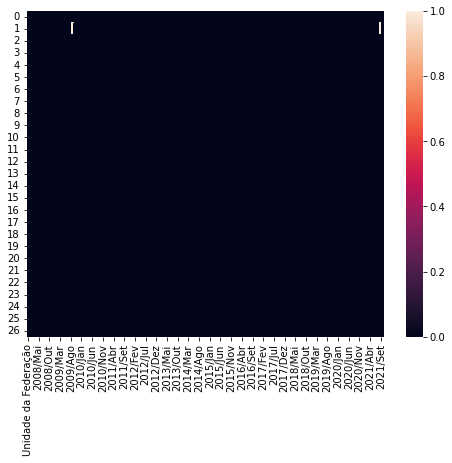

In [13]:
dados_mortalidade = df2
print('Número de Linhas {}'.format(dados_mortalidade.shape[0]))
print('Número de Colunas {}'.format(dados_mortalidade.shape[1]))

plt.figure(figsize=(8,6));
sns.heatmap(dados_mortalidade.isnull());

In [14]:

dados_mortalidade_numerico = dados_mortalidade.select_dtypes(include = ['int64', 'float64'])

# Analise Descritiva
dados_mortalidade_min = pd.DataFrame(dados_mortalidade_numerico .min())
dados_mortalidade_max = pd.DataFrame(dados_mortalidade_numerico .max())
dados_mortalidade_range = pd.DataFrame(dados_mortalidade_max - dados_mortalidade_min)
dados_mortalidade_mean = pd.DataFrame(dados_mortalidade_numerico.mean())
dados_mortalidade_std = pd.DataFrame(dados_mortalidade_numerico.std())
dados_mortalidade_skew = pd.DataFrame(dados_mortalidade_numerico.skew())
dados_mortalidade_kurtosis = pd.DataFrame(dados_mortalidade_numerico.kurtosis())

dados_mortalidade_numerico_description = pd.concat([dados_mortalidade_min, dados_mortalidade_max, dados_mortalidade_range, dados_mortalidade_mean, dados_mortalidade_std, dados_mortalidade_skew, dados_mortalidade_kurtosis], axis = 1).round(2)
dados_mortalidade_numerico_description.columns = ['min', 'max', 'range', 'mean', 'std', 'skew', 'kurtosis']
dados_mortalidade_numerico_description

,min,max,range,mean,std,skew,kurtosis
2008/Jan,0.94,4.45,3.51,2.27,0.89,0.64,-0.09
2008/Fev,1.16,4.40,3.24,2.63,0.92,0.16,-0.83
2008/Mar,1.04,4.43,3.39,2.55,0.93,0.48,-0.25
2008/Abr,1.00,4.37,3.37,2.65,0.93,0.13,-0.60
2008/Mai,1.20,4.94,3.74,2.52,0.96,0.93,0.58
...,...,...,...,...,...,...,...
2021/Jun,3.82,10.07,6.25,6.86,1.85,0.03,-0.96
2021/Jul,3.29,9.73,6.44,6.36,1.77,0.11,-1.00
2021/Ago,3.37,9.45,6.08,5.81,1.63,0.32,-0.74
2021/Set,3.04,9.71,6.67,5.34,1.50,0.96,1.51


In [15]:
if 'Unidade da Federação' in dados_mortalidade.columns:
  dados_mortalidade = dados_mortalidade.set_index("Unidade da Federação")

dados_mortalidade


,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,...,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1.38,1.36,1.04,1.00,1.20,1.21,1.44,1.50,1.40,1.75,1.28,1.24,1.55,1.24,1.40,1.57,1.16,1.53,1.55,1.44,1.43,1.53,1.74,1.20,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,2.23,...,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.69,3.51,3.92,5.12,5.27,5.51,4.54,3.52,2.90,4.38,4.95,5.03,8.42,7.40,6.58,5.62,4.63,4.03,4.34,2.79
12 Acre,1.44,3.06,2.01,2.76,2.60,1.76,2.34,2.73,2.28,1.87,1.38,1.60,3.07,2.29,2.23,2.19,2.30,1.84,2.18,1.92,nan,2.75,2.55,2.57,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,3.29,...,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,4.32,3.94,4.09,3.29,3.98,3.65,5.40,5.17,7.79,6.58,3.82,4.86,4.15,nan,3.01
13 Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,1.56,1.27,1.65,2.09,1.52,1.24,2.11,2.07,2.33,2.08,2.38,2.26,1.98,2.10,2.09,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,2.55,...,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.25,3.41,3.21,3.17,3.84,3.12,4.80,10.36,9.78,6.08,4.61,4.39,3.94,4.73,4.35,9.08,9.32,10.71,6.77,5.06,4.71,4.74,3.65,3.71,2.98
14 Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,2.08,...,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,3.49,3.27,3.93,3.63,6.02,9.75,8.10,6.30,5.23,5.49,4.68,4.84,4.43,2.78
15 Pará,1.41,1.40,1.53,1.27,1.39,1.45,1.64,1.51,1.73,1.56,1.33,1.45,1.66,1.61,1.57,1.61,1.72,1.58,1.66,1.59,1.74,1.61,1.63,1.47,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,1.67,...,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.20,2.24,2.47,2.36,2.38,2.39,2.88,4.53,6.91,4.57,4.55,3.31,2.75,2.84,2.90,3.17,3.48,4.10,5.68,5.97,4.10,3.29,3.37,3.04,2.23
16 Amapá,2.72,3.06,1.86,2.26,2.19,1.61,1.90,1.85,1.87,2.37,2.07,2.95,2.28,1.99,1.46,2.49,2.05,2.54,2.11,2.37,2.53,2.22,1.97,2.52,2.89,2.67,2.38,2.89,1.51,2.71,2.52,1.71,2.22,1.82,2.30,2.11,2.66,2.66,2.07,2.44,...,2.90,2.45,2.09,2.27,2.65,2.28,3.19,2.08,3.17,3.34,3.05,2.82,2.48,2.45,2.25,2.88,2.88,2.42,3.11,2.18,2.44,4.16,8.83,7.62,7.18,4.85,2.72,3.21,2.63,4.96,3.81,4.08,6.10,5.45,7.72,5.25,4.57,3.97,3.76,2.81
17 Tocantins,2.12,2.75,2.67,2.39,2.01,2.65,2.63,2.43,2.19,2.04,2.38,2.60,2.13,2.94,1.96,2.05,2.37,2.31,2.65,2.62,2.55,2.90,2.43,2.10,2.70,2.65,2.94,2.31,2.33,2.29,2.66,2.49,2.13,2.78,2.61,2.65,2.49,2.67,2.31,2.63,...,3.37,3.60,3.16,3.32,3.20,2.50,4.32,4.32,4.05,3.42,3.04,3.42,2.97,2.94,3.33,3.07,3.42,3.04,3.76,3.67,4.21,3.70,3.92,4.64,5.38,5.27,5.57,4.83,4.62,4.15,4.10,4.85,6.16,4.91,5.13,5.74,5.07,4.81,3.64,2.98
21 Maranhão,0.94,1.25,1.17,1.18,1.34,1.07,1.23,1.41,1.27,1.07,0.81,1.24,1.17,1.31,1.24,1.21,1.35,1.19,1.08,1.38,1.35,1.12,1.21,1.44,1.28,1.32,1.45,1.37,1.32,1.37,1.44,1.31,1.30,1.25,1.36,1.16,1.39,1.33,1.66,1.48,...,2.25,2.22,2.07,1.99,2.13,2.29,2.63,2.32,2.61,2.27,2.45,2.6

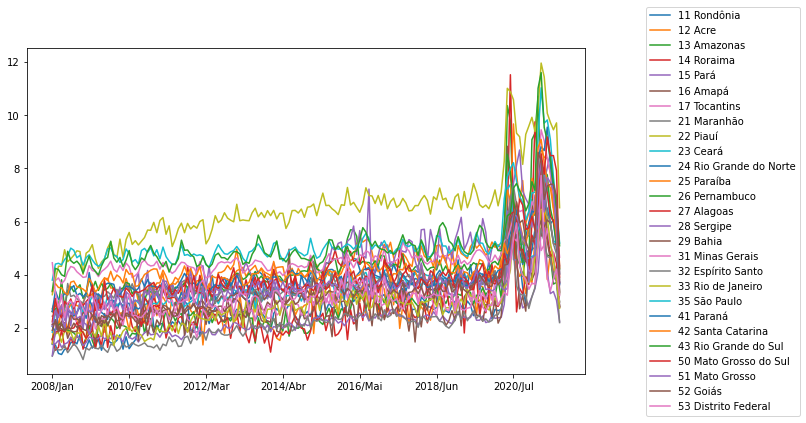

In [16]:
dados_mortalidade_ax = dados_mortalidade.T.plot(figsize=(10,6))
dados_mortalidade_ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.5))

In [17]:
dados_mortalidade['Medias_mortalidade'] = dados_mortalidade.mean(axis=1)
dados_mortalidade_medias = dados_mortalidade['Medias_mortalidade'].tolist()

In [18]:
dados_mortalidade_medias

[2.7294578313252997,
 3.0327439024390253,
 2.901506024096385,
 2.676325301204819,
 2.2603614457831345,
 2.8260240963855416,
 3.0548192771084355,
 2.1806626506024096,
 2.7825301204819275,
 3.6486144578313255,
 3.691084337349398,
 4.45734939759036,
 4.223975903614456,
 3.7363855421686756,
 4.304518072289157,
 3.4019879518072282,
 4.656746987951807,
 3.7959036144578313,
 6.477530120481929,
 5.197409638554218,
 4.047771084337351,
 4.242710843373496,
 5.10704819277108,
 3.9043975903614445,
 3.618012048192772,
 3.3239156626506015,
 3.2131325301204834]

In [19]:
dados_estados_medias['Medias_mortalidade'] = dados_mortalidade_medias
dados_comparação = dados_estados_medias

In [20]:
correlação_geral = dados_comparação['Medias_gasto_profissionais'].corr(dados_comparação['Medias_mortalidade'])
correlação_geral

0.554164582267593

In [21]:
#Comparação será a razão entre as médias de mortalidade e a média de gastos com profissionais da área.
#Sendo assim, caso um estado tenha um valor muito alto na comparação - podemos entender que a relação entre as suas médias de mortalidade e o gasto nesses estados estão assimétricos
#Valendo valer com mais atenção.
#Assim, como estados que tenham essa relação próxima de 1 - podemos entender que a média de gasto e sua mortalidade no estado estão alinhados com uma política mais eficiente.
#crescendo ou diminuindo em proporções mais simétricas.
dados_comparação['Comparação'] = dados_comparação.Medias_mortalidade/dados_comparação.Medias_gasto_profissionais


In [22]:
piores_5_estados_comparacao = dados_comparação.sort_values(by=['Comparação']).tail()
melhores_5_estados_comparacao = dados_comparação.sort_values(by=['Comparação']).head()

In [32]:
melhores_5_estados_comparacao

,Medias_gasto_profissionais,Medias_mortalidade,Comparação
Unidade da Federação,,,
35 São Paulo,6.24,5.20,0.83
31 Minas Gerais,3.06,4.66,1.52
41 Paraná,2.23,4.05,1.81
29 Bahia,1.63,3.40,2.09
15 Pará,0.85,2.26,2.66


In [38]:
melhores_5_estados_comparacao_cor = melhores_5_estados_comparacao['Medias_gasto_profissionais'].corr(melhores_5_estados_comparacao['Medias_mortalidade'])
print(f'A correlação  entre gasto com profissionais e a taxa de mortalidade nos 5 melhores estado é de: %s' %melhores_5_estados_comparacao_cor)

A correlação  entre gasto com profissionais e a taxa de mortalidade nos 5 melhores estado é de: 0.8775026801406501


In [36]:
piores_5_estados_comparacao


,Medias_gasto_profissionais,Medias_mortalidade,Comparação
Unidade da Federação,,,
11 Rondônia,0.16,2.73,17.57
28 Sergipe,0.23,4.30,19.07
12 Acre,0.09,3.03,35.41
16 Amapá,0.07,2.83,41.92
14 Roraima,0.06,2.68,42.04


In [39]:
piores_5_estados_comparacao_cor = piores_5_estados_comparacao['Medias_gasto_profissionais'].corr(piores_5_estados_comparacao['Medias_mortalidade'])
print(f'A correlação entre gasto com profissionais e a taxa de mortalidade nos 5 melhores estado é de: %s' %piores_5_estados_comparacao_cor)

A correlação entre gasto com profissionais e a taxa de mortalidade nos 5 melhores estado é de: 0.81529745121808


In [26]:
#Concluimos que os estados com os maiores valores de comparação, são os estados com maior assimetria entre o gasto com profissionais em relação a média de gastos dos outros estados e a média de mortalidade